### 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [3]:
#設定資料讀取路徑
dir_path = '/home/edith/文件/100days-data/'
data_app1 = os.path.join(dir_path,'application_train.csv')
data_app2 = os.path.join(dir_path,'application_test.csv')

data_train = pd.read_csv(data_app1)
data_test = pd.read_csv(data_app2)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns 寫迴圈
for col in data_train:
    if data_train[col].dtype == 'object':
        #if 2 or fewer unique categories
        if len(list(data_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(data_train[col])
            # Transform both training and testing data
            data_train[col] = le.transform(data_train[col])
            data_test[col] = le.transform(data_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [35]:
# Create an anomalous flag column 
data_train['DAYS_EMPLOYED_ANOM'] = data_train["DAYS_EMPLOYED"] == 365243
data_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
data_test['DAYS_EMPLOYED_ANOM'] = data_test["DAYS_EMPLOYED"] == 365243
data_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
data_test['DAYS_BIRTH'] = abs(data_test['DAYS_BIRTH'])

In [45]:
data_train['YEARS_BIRTH_GROUP'] = pd.cut(data_train['DAYS_BIRTH']/365, 10)
data_train['YEARS_BIRTH_GROUP'].value_counts()
# data_train['YEARS_BIRTH_GROUP'].head()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: YEARS_BIRTH_GROUP, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

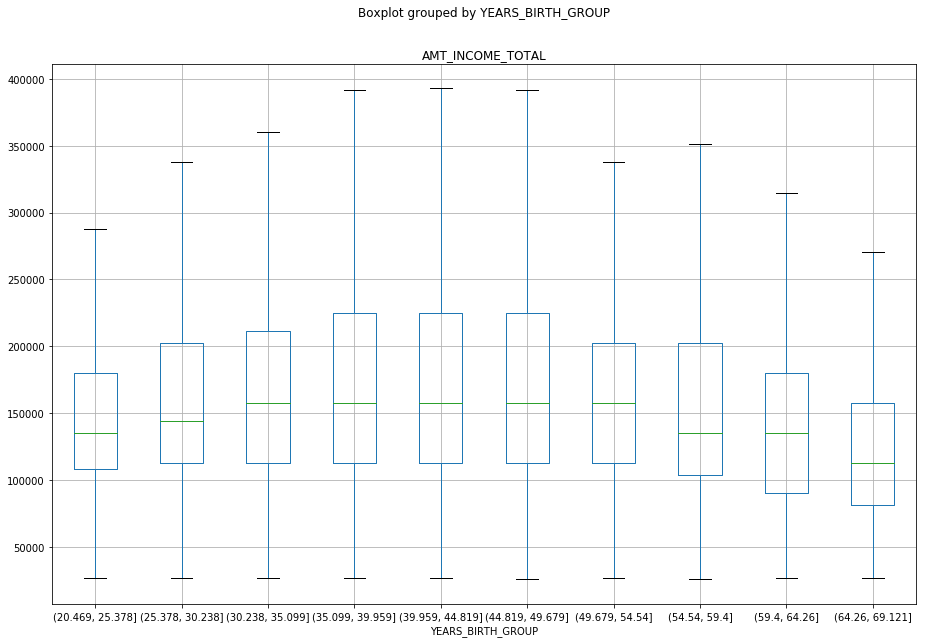

In [54]:
data_train.boxplot(column = 'AMT_INCOME_TOTAL', by = 'YEARS_BIRTH_GROUP', showfliers = False, figsize=(15,10))
# plt.suptitle('123')
plt.show

In [61]:
#等寬分割10等分
data_train["AMT_INCOME_TOTAL_equal_width"] = pd.cut(data_train['AMT_INCOME_TOTAL'], 10)
data_train["AMT_INCOME_TOTAL_equal_width"].value_counts().sort_index()

(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(23420520.0, 35117955.0]           0
(35117955.0, 46815390.0]           0
(46815390.0, 58512825.0]           0
(58512825.0, 70210260.0]           0
(70210260.0, 81907695.0]           0
(81907695.0, 93605130.0]           0
(93605130.0, 105302565.0]          0
(105302565.0, 117000000.0]         1
Name: AMT_INCOME_TOTAL_equal_width, dtype: int64

In [66]:
# 等頻分割10等分
data_train["AMT_INCOME_TOTAL_equal_freq"] = pd.qcut(data_train['AMT_INCOME_TOTAL'], 10)
data_train["AMT_INCOME_TOTAL_equal_freq"].value_counts().sort_index()

(25649.999, 81000.0]       33391
(81000.0, 99000.0]         30280
(99000.0, 112500.0]        36907
(112500.0, 135000.0]       48849
(135000.0, 147150.0]        4333
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(180000.0, 225000.0]       44809
(225000.0, 270000.0]       19957
(270000.0, 117000000.0]    27161
Name: AMT_INCOME_TOTAL_equal_freq, dtype: int64